In [1]:
import matplotlib.pyplot as plt

# Building Environment and Network #

In [2]:
import renom as rm
import renom_rl 
from renom_rl.discrete.dqn import DQN
from renom_rl.continuous.ddpg import DDPG
from renom_rl.environ.openai import *


#discrete
env0 = CartPole01()
model0 = rm.Sequential([
    rm.Dense(10),
    rm.Dense(2),
])

#continuous
env1 = Pendulum()

class Actor(rm.Model):
    
    def __init__(self):
        self.action_size = 1
        self.high = 2.0
        self._l1 = rm.Dense(10)
        self._l2 = rm.Dense(1)
    
    def forward(self, x):
        h1 = rm.relu(self._l1(x))
        h2 = rm.relu(self._l2(h1))
        h = h2*self.high
        return h
    
class Critic(rm.Model):

    def __init__(self):        
        self._l1 = rm.Dense(10)
        self._l2 = rm.Dense(10)
        self._l3 = rm.Dense(1)
  
    def forward(self, x, action):
        h1 = rm.relu(self._l1(x))
        h2 = rm.relu(self._l2(rm.concat(h1, action)))
        h = self._l3(h2)        
        return h

actor=Actor()
critic=Critic()


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/Users/mikeogawa/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


## Instance of Algorithm ##

In [3]:
dqn = DQN(env0, model0)
ddpg = DDPG(env1,actor,critic)
# agent.fit(random_step=1, epoch=1, epoch_step=10)

## Confirming Classes Inside Modules ##

In [18]:
#method 1: using inspect

mod=renom_rl.utility.filter

# import inspect
# dic_list = dict(inspect.getmembers(mod,inspect.isclass))
# for k in dic_list:
#     print(k)


#method 2: using import lib

# import importlib
# module = importlib.import_module("renom_rl.utility.filter")
# my_class = getattr(module, 'OU')
# a=my_class()
    
#method 3: using help
# help(mod)

## Confirming Epsilon Greedy Filter for Discrete ReNom ##

In [19]:
from renom_rl.utility.filter import *

# creating testing set
epsilons=[EpsilonSL(),EpsilonEI(),EpsilonC(),0.5]
epsilongreedy=[EpsilonGreedyFilter(epsilon=j) for j in epsilons]
obj_list = epsilongreedy + [EpsilonGreedyFilter(),EpsilonCFilter(),EpsilonEIFilter(),EpsilonSLFilter()]

probe=[]

# using event handler
@dqn.events.step
def callback(*args):
    probe.append(args[5])
    
@dqn.events.end_epoch
def es(*args):
    print("done")

# start testing
res=[]
for obj in obj_list:
    probe=[]
    dqn.fit(random_step=1, epoch=1, epoch_step=20, action_filter=obj)
    res.append(probe)

epoch 0001 epsilon 0.9992 loss 0.0824 rewards in epoch -1.000 episode 0001 rewards in episode -1.000.:  95%|█████████▌| 19/20 [00:00<00:00, 176.26it/s]

Run random 1 step for storing experiences


epoch 001 avg_loss:0.0154 total reward in epoch: [train:-1.000 test:-77.0] avg train reward in episode:-1.000 epsilon :0.999: 100%|██████████| 20/20 [00:00<00:00, 37.48it/s] 
epoch 0001 epsilon 0.5000 loss 0.0616 rewards in epoch -1.000 episode 0001 rewards in episode -1.000.:  95%|█████████▌| 19/20 [00:00<00:00, 245.53it/s]

done
Run random 1 step for storing experiences


epoch 001 avg_loss:0.0100 total reward in epoch: [train:-1.000 test:-82.0] avg train reward in episode:-1.000 epsilon :0.500: 100%|██████████| 20/20 [00:00<00:00, 40.86it/s]
epoch 0001 epsilon 0.0000 loss 0.0700 rewards in epoch 0.000 episode 0000 rewards in episode 0.000.:  95%|█████████▌| 19/20 [00:00<00:00, 236.12it/s]

done
Run random 1 step for storing experiences


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
epoch 001 avg_loss:0.0172 total reward in epoch: [train:0.000 test:-81.0] avg train reward in episode: nan epsilon :0.000: 100%|██████████| 20/20 [00:00<00:00, 40.52it/s]
epoch 0001 epsilon 0.5000 loss 0.0385 rewards in epoch 0.000 episode 0000 rewards in episode 0.000.:  95%|█████████▌| 19/20 [00:00<00:00, 245.89it/s]

done
Run random 1 step for storing experiences


epoch 001 avg_loss:0.0084 total reward in epoch: [train:0.000 test:-82.0] avg train reward in episode: nan epsilon :0.500: 100%|██████████| 20/20 [00:00<00:00, 41.06it/s]
epoch 0001 epsilon 0.9992 loss 0.0745 rewards in epoch -1.000 episode 0001 rewards in episode -1.000.:  95%|█████████▌| 19/20 [00:00<00:00, 249.27it/s]

done
Run random 1 step for storing experiences


epoch 001 avg_loss:0.0074 total reward in epoch: [train:-1.000 test:-83.0] avg train reward in episode:-1.000 epsilon :0.999: 100%|██████████| 20/20 [00:00<00:00, 41.16it/s]
epoch 0001 epsilon 0.1000 loss 0.0257 rewards in epoch 0.000 episode 0000 rewards in episode 0.000.:  95%|█████████▌| 19/20 [00:00<00:00, 246.28it/s]

done
Run random 1 step for storing experiences


epoch 001 avg_loss:0.0061 total reward in epoch: [train:0.000 test:-82.0] avg train reward in episode: nan epsilon :0.100: 100%|██████████| 20/20 [00:00<00:00, 39.35it/s]
epoch 0001 epsilon 0.5000 loss 0.0317 rewards in epoch -1.000 episode 0001 rewards in episode -1.000.: 100%|██████████| 20/20 [00:00<00:00, 198.93it/s]

done
Run random 1 step for storing experiences


epoch 001 avg_loss:0.0077 total reward in epoch: [train:-1.000 test:-85.0] avg train reward in episode:-1.000 epsilon :0.500: 100%|██████████| 20/20 [00:00<00:00, 198.93it/s]
epoch 0001 epsilon 0.9992 loss 0.0618 rewards in epoch 0.000 episode 0000 rewards in episode 0.000.:  95%|█████████▌| 19/20 [00:00<00:00, 217.06it/s]

done
Run random 1 step for storing experiences


epoch 001 avg_loss:0.0106 total reward in epoch: [train:0.000 test:-76.0] avg train reward in episode: nan epsilon :0.999: 100%|██████████| 20/20 [00:00<00:00, 36.17it/s]

done


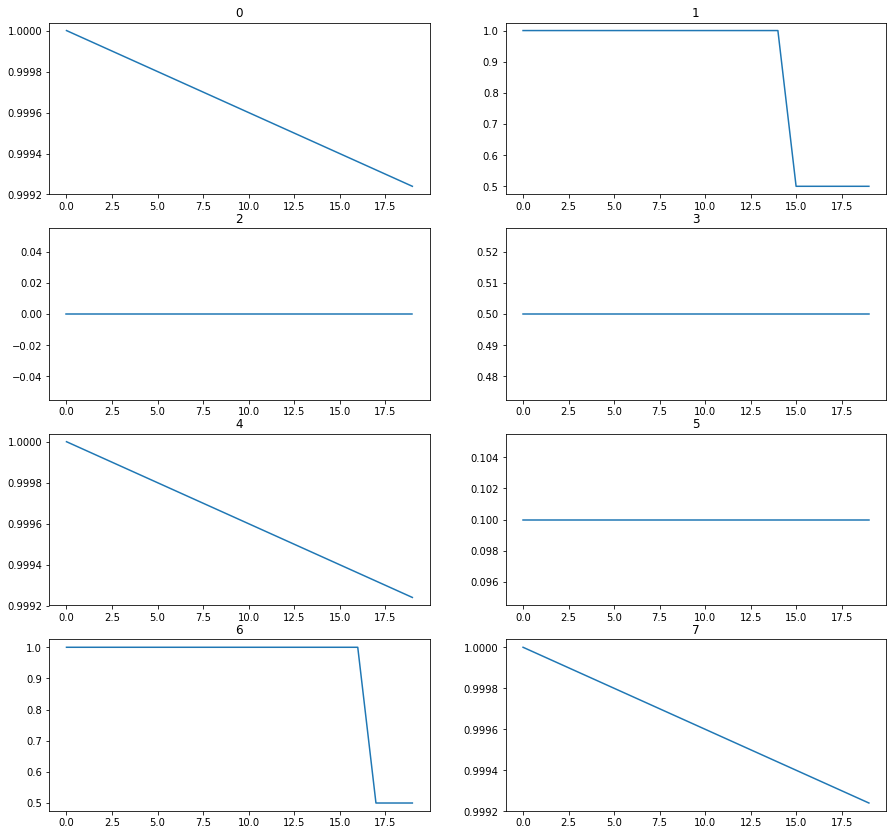

In [20]:
plt.figure(figsize=(15,10))

for i in range(len(res)):
    plt.subplot(int(len(res)/2)+1, 2 ,i+1)
    plt.plot(range(len(res[i])),res[i])
    plt.title(i)
    plt.subplots_adjust(bottom=-0.5)
plt.show()

## Confirming Noise for Continous Action ##

In [15]:
from renom_rl.utility.filter import *

noise=[OU(),GP()]

addnoise=[AddNoiseFilter(noise=j,epsilon=1) for j in noise]

obj_list=addnoise+[OUFilter(epsilon=0.3,test_epsilon=0.2),GPFilter(epsilon=0.3,test_epsilon=0.2),NoNoiseFilter()]


probe2=[]
@ddpg.events.step
def callback(*args):
    probe2.append(args[7])

res2=[]
for obj in obj_list:
    probe2=[]
    ddpg.fit(random_step=1, epoch=1, epoch_step=50, action_filter=obj)
    res2.append(probe2)

epoch: 001 Each step reward:-341.99:  98%|█████████▊| 49/50 [00:00<00:00, 56.27it/s]/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
epoch 001 avg_loss: 3.882 total_reward [train:-341.991 test:-15474.747] avg train reward in episode: nan e-rate:1.000: 100%|██████████| 50/50 [00:01<00:00, 32.26it/s]
epoch 001 avg_loss: 3.004 total_reward [train:-391.441 test:-15587.585] avg train reward in episode: nan e-rate:1.000: 100%|██████████| 50/50 [00:01<00:00, 34.45it/s]
epoch 001 avg_loss: 2.268 total_reward [train:-388.086 test:-15869.444] avg train reward in episode: nan e-rate:0.300: 100%|██████████| 50/50 [00:01<00:00, 34.32it/s]
epoch 001 avg_loss: 1.408 total_reward [train:-377.444 test:-15511.724] avg train reward in episode: nan e-rate:0.300: 100%

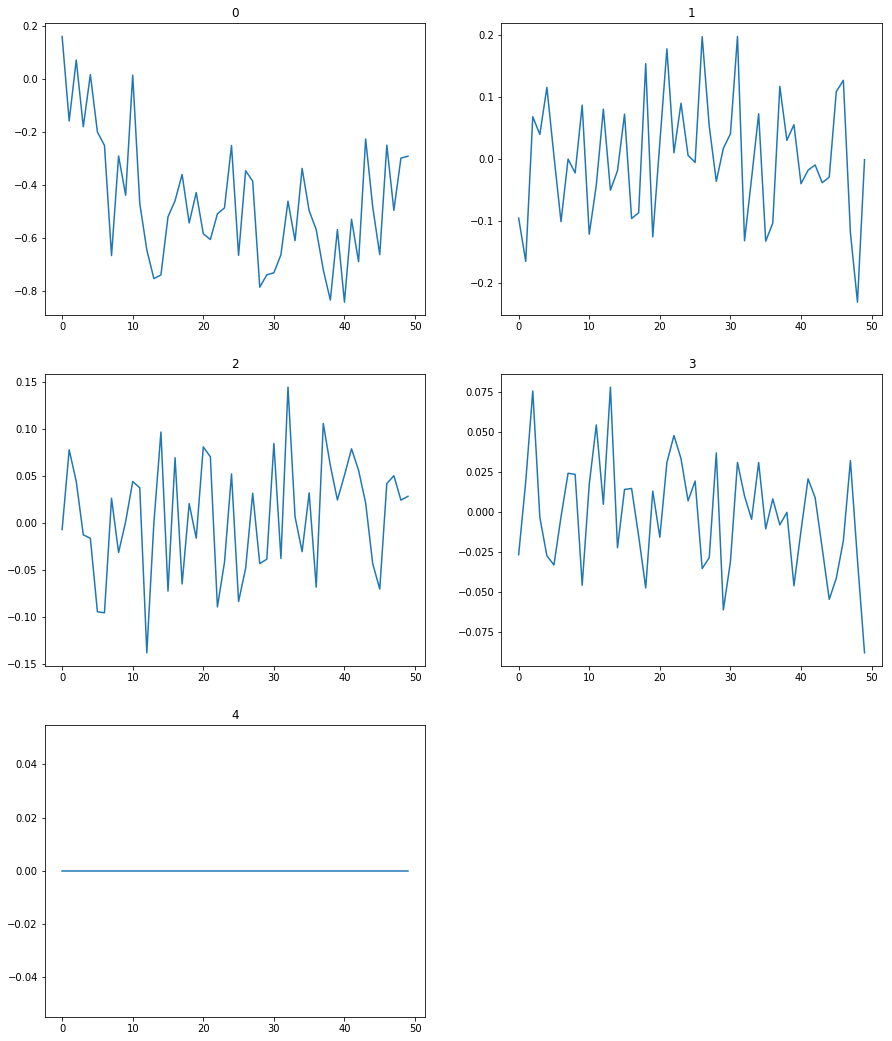

In [17]:
plt.figure(figsize=(15,10))

for i in range(len(res2)):
    plt.subplot(int(len(res2)/2)+1, 2 ,i+1)
    plt.plot(range(len(res2[i])),res2[i])
    plt.title(i)
    plt.subplots_adjust(bottom=-0.5)
plt.show()